In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df_01 = pd.read_csv('../CP/Advertising.csv', delimiter=',')
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df_01.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [46]:
matriz_corr = df_01.corr(method='pearson')

In [47]:
matriz_corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


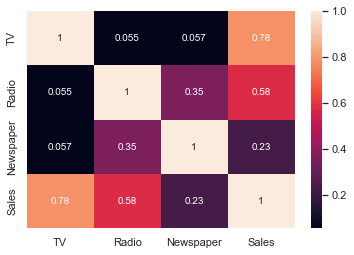

In [50]:
sns.heatmap(matriz_corr, annot=True);

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [99]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [100]:
x_mult = df_01.values[:,:1]
y_mult = np.array(df_01.iloc[:, -1])

In [101]:
y_mult = y_mult.reshape(-1,1)

In [102]:
x_mult.shape

(200, 1)

In [103]:


X_train, X_test, y_train, y_test = train_test_split(x_mult, y_mult, test_size = 0.20)

In [104]:
y_train.shape

(160, 1)

In [105]:
model.fit(X_train, y_train)

LinearRegression()

In [106]:
y_pred = model.predict(X_test)

In [107]:
y_pred.shape
y_test.shape

(40, 1)

In [108]:
print("Mean squared error con 2: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error con 2: 13.68


In [97]:
print("Mean squared error con 3: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 3.27


In [ ]:
print("Mean squared error con 2: %.2f" % mean_squared_error(y_test, y_pred))

PUNTO 3

In [3]:
df_03 = pd.read_csv('../CP/ML_Cars_dataset.csv', delimiter=',')
df_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      205 non-null    object 
 1   enginelocation  195 non-null    object 
 2   carwidth        203 non-null    object 
 3   curbweight      205 non-null    int64  
 4   enginetype      205 non-null    object 
 5   cylindernumber  205 non-null    object 
 6   stroke          205 non-null    float64
 7   peakrpm         205 non-null    int64  
 8   price           205 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 14.5+ KB


In [4]:
df_03.isna().sum()

aspiration         0
enginelocation    10
carwidth           2
curbweight         0
enginetype         0
cylindernumber     0
stroke             0
peakrpm            0
price              0
dtype: int64

In [119]:
df_03['carwidth'] = df_03['carwidth'].fillna(0)

In [5]:
#df['a'] = pd.to_numeric(df['a'],errors = 'coerce')
df_03['carwidth'] = pd.to_numeric(df_03['carwidth'], errors = 'coerce')

In [6]:
df_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      205 non-null    object 
 1   enginelocation  195 non-null    object 
 2   carwidth        199 non-null    float64
 3   curbweight      205 non-null    int64  
 4   enginetype      205 non-null    object 
 5   cylindernumber  205 non-null    object 
 6   stroke          205 non-null    float64
 7   peakrpm         205 non-null    int64  
 8   price           205 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 14.5+ KB


In [10]:
df_nd = df_03.drop_duplicates(subset=None, 
                          keep='first', 
                          inplace=False, 
                          ignore_index=False)

In [24]:
X = df_nd.drop('price', axis=1)
y = df_nd.price
X.head(10)

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm
0,std,front,64.1,2548,dohc,four,2.68,5000
2,std,front,65.5,2823,ohcv,six,3.47,5000
3,std,front,NaN,2337,ohc,four,3.40,5500
4,std,front,66.4,2824,ohc,five,3.40,5500
5,std,front,66.3,2507,ohc,five,3.40,5500
6,std,front,71.4,2844,ohc,five,3.40,5500
7,std,front,NaN,2954,ohc,five,3.40,5500
8,turbo,front,71.4,3086,ohc,five,3.40,5500
9,turbo,front,67.9,3053,ohc,five,3.40,5500
10,std,front,64.8,2395,ohc,four,2.80,5800


In [15]:
X_tr3, X_te3, y_tr3, y_te3 = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


In [25]:
scaler = StandardScaler()
#scaler.fit(X_train)
simple_i = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit(X)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)  
X_t = simple_i.transform(X)
X_t


array([['std', 'front', 64.1, ..., 'four', 2.68, 5000],
       ['std', 'front', 65.5, ..., 'six', 3.47, 5000],
       ['std', 'front', 66.5, ..., 'four', 3.4, 5500],
       ...,
       ['std', 'front', 68.9, ..., 'six', 2.87, 5500],
       ['turbo', 'front', 68.9, ..., 'six', 3.4, 4800],
       ['turbo', 'front', 68.9, ..., 'four', 3.15, 5400]], dtype=object)

In [23]:
X_t

array([['std', 'front', 64.1, ..., 'four', 2.68, 5000],
       ['std', 'front', 65.5, ..., 'six', 3.47, 5000],
       ['std', 'front', 66.5, ..., 'four', 3.4, 5500],
       ...,
       ['std', 'front', 68.9, ..., 'six', 2.87, 5500],
       ['turbo', 'front', 68.9, ..., 'six', 3.4, 4800],
       ['turbo', 'front', 68.9, ..., 'four', 3.15, 5400]], dtype=object)

In [43]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse = False)
onehot_encoder_e = OneHotEncoder()

In [29]:
aspiration = df_nd.aspiration.values.reshape(-1,1)
print(np.unique(aspiration))
enginetype = df_nd.enginetype.values.reshape(-1,1)
print(np.unique(enginetype))


['std' 'turbo']
['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']


In [44]:
aspiration_t = onehot_encoder.fit_transform(aspiration)
onehot_encoder_e.fit(enginetype)

OneHotEncoder()

In [47]:
onehot_encoder_e.categories_
engine_t = onehot_encoder_e.transform(enginetype)

In [57]:
print(engine_t)

  (0, 0)	1.0
  (1, 5)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 3)	1.0
  (7, 3)	1.0
  (8, 3)	1.0
  (9, 3)	1.0
  (10, 3)	1.0
  (11, 3)	1.0
  (12, 3)	1.0
  (13, 3)	1.0
  (14, 3)	1.0
  (15, 3)	1.0
  (16, 2)	1.0
  (17, 3)	1.0
  (18, 3)	1.0
  (19, 3)	1.0
  (20, 3)	1.0
  (21, 3)	1.0
  (22, 3)	1.0
  (23, 3)	1.0
  (24, 3)	1.0
  :	:
  (166, 0)	1.0
  (167, 0)	1.0
  (168, 3)	1.0
  (169, 3)	1.0
  (170, 3)	1.0
  (171, 3)	1.0
  (172, 3)	1.0
  (173, 3)	1.0
  (174, 3)	1.0
  (175, 3)	1.0
  (176, 3)	1.0
  (177, 3)	1.0
  (178, 3)	1.0
  (179, 3)	1.0
  (180, 3)	1.0
  (181, 3)	1.0
  (182, 3)	1.0
  (183, 3)	1.0
  (184, 3)	1.0
  (185, 3)	1.0
  (186, 3)	1.0
  (187, 3)	1.0
  (188, 5)	1.0
  (189, 3)	1.0
  (190, 3)	1.0


In [58]:
#onehot_encoder_e.categories_
df_nd['aspiration_std'] = aspiration_t[:,0]
df_nd['aspiration_turb'] = aspiration_t[:,1]
#df_nd['engineType_dohc'] = engine_t[:,0]
#df_nd['engineType_dohcv'] = engine_t[:,1]
#df_nd['engineType_l'] = engine_t[:,2]
#df_nd['engineType_ohc'] = engine_t[:,3]
#df_nd['engineType_ohcf'] = engine_t[:,4]
#df_nd['engineType_ohcv'] = engine_t[:,5]
#df_nd['engineType_rotor'] = engine_t[:,6]


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16048\1965192121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nd['aspiration_std'] = aspiration_t[:,0]
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16048\1965192121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nd['aspiration_turb'] = aspiration_t[:,1]


In [62]:
df_nd.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price,aspiration_std,aspiration_turb
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive,1.0,0.0
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive,1.0,0.0
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive,1.0,0.0
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive,1.0,0.0
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive,1.0,0.0


In [63]:
precio = df_nd.price.values.reshape(-1,1)
print(np.unique(precio))


['cheap' 'expensive']


In [65]:
precio_cod = onehot_encoder.fit_transform(precio)


In [66]:
df_nd['barato'] = precio_cod[:,0]
df_nd['caro'] = precio_cod[:,1]

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16048\3526418550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nd['barato'] = precio_cod[:,0]
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16048\3526418550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nd['caro'] = precio_cod[:,1]


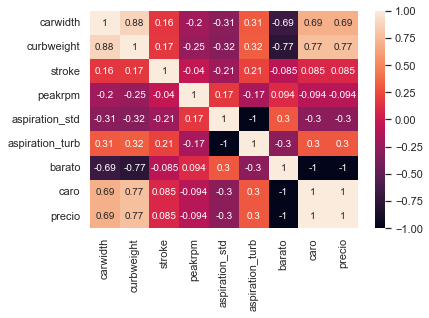

In [74]:
matriz_corr1 = df_nd.corr(method='pearson')
sns.heatmap(matriz_corr1, annot=True);

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
precio_cod = le.fit_transform(df_nd['price'].values)

In [70]:
df_nd['precio']= precio_cod.reshape(-1,1)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16048\2833544313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nd['precio']= precio_cod.reshape(-1,1)


In [80]:
df_nd.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price,aspiration_std,aspiration_turb,precio
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive,1.0,0.0,1
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive,1.0,0.0,1
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive,1.0,0.0,1
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive,1.0,0.0,1
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive,1.0,0.0,1


In [116]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [109]:
df_nd.drop('carwidth', axis=1, inplace= True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16048\3576058844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nd.drop('carwidth', axis=1, inplace= True)


In [110]:

X = df_nd.drop('precio', axis=1)
y = df_nd.precio
X.head(10)

,curbweight,stroke,peakrpm,aspiration_std,aspiration_turb,ancho
0,2548,2.68,5000,1.0,0.0,64.1
2,2823,3.47,5000,1.0,0.0,65.5
3,2337,3.40,5500,1.0,0.0,66.5
4,2824,3.40,5500,1.0,0.0,66.4
5,2507,3.40,5500,1.0,0.0,66.3
6,2844,3.40,5500,1.0,0.0,71.4
7,2954,3.40,5500,1.0,0.0,66.5
8,3086,3.40,5500,0.0,1.0,71.4
9,3053,3.40,5500,0.0,1.0,67.9
10,2395,2.80,5800,1.0,0.0,64.8


In [106]:
simple_i = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit(X)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)  
X_t = simple_i.transform(X)
X_t
#df_nd['ancho'] = pd.DataFrame(X_t)
df_nd['ancho'] = X_t[:,0]

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16048\3966202403.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nd['ancho'] = X_t[:,0]


In [107]:
X.head(10)

,carwidth,curbweight,stroke,peakrpm,aspiration_std,aspiration_turb
0,64.1,2548,2.68,5000,1.0,0.0
2,65.5,2823,3.47,5000,1.0,0.0
3,NaN,2337,3.40,5500,1.0,0.0
4,66.4,2824,3.40,5500,1.0,0.0
5,66.3,2507,3.40,5500,1.0,0.0
6,71.4,2844,3.40,5500,1.0,0.0
7,NaN,2954,3.40,5500,1.0,0.0
8,71.4,3086,3.40,5500,0.0,1.0
9,67.9,3053,3.40,5500,0.0,1.0
10,64.8,2395,2.80,5800,1.0,0.0


In [111]:
X_tr3, X_te3, y_tr3, y_te3 = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
modelo = LogisticRegression(penalty='none')
modelo.fit(X = X_tr3, y = y_tr3)

LogisticRegression(penalty='none')

In [118]:
y_train_pred = modelo.predict(X_tr3)
y_test_pred = modelo.predict(X_te3)
train_acc = accuracy_score(y_tr3, y_train_pred)
test_acc = accuracy_score(y_te3, y_test_pred)
reacall = recall_score(y_te3, y_test_pred)

print('Porcentaje de aceirtos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aceirtos sobre el set de evaluación:',test_acc)
print('Recall evaluación:',reacall)

Porcentaje de aceirtos sobre el set de entrenamiento: 0.8947368421052632
Porcentaje de aceirtos sobre el set de evaluación: 0.9230769230769231
Recall evaluación: 0.9583333333333334


In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_true = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

In [120]:
accur = accuracy_score(y_true,y_pred)
rec = recall_score(y_true,y_pred)

print(accur)
print(rec)

0.7
0.8


In [121]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_test = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1] # actual truths
preds = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1] # predictions

In [123]:
cfm = confusion_matrix(y_true, y_pred)

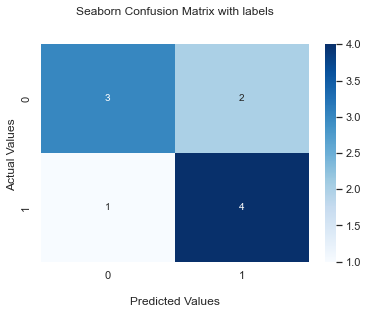

In [126]:
ax = sns.heatmap(cfm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [129]:
df2 = pd.read_csv("../CP/ML_Houses_clean.csv")

In [130]:
df2.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000


In [131]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
knn_model = KNeighborsRegressor()
X1 = df2.drop(columns = ['SalePrice'])
y1 = df2.SalePrice
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1_rescaled = scaler.fit_transform(X1)
cv_results = cross_validate(knn_model, X1_rescaled, y1, cv=5)

In [143]:
X1_rescaled.shape

(1460, 5)

In [144]:
y1.shape

(1460,)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X1_rescaled, y1, test_size=0.2, random_state=42)

In [132]:
rescaled_score = cv_results['test_score'].mean()
rescaled_score


0.649019431450802

In [136]:
k_vecinos = np.arange(1,25,1)

In [137]:
k_vecinos

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [147]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 2
clf = KNeighborsClassifier(n_neighbors =n_neighbors )

In [148]:
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
#k_vecinos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]


# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

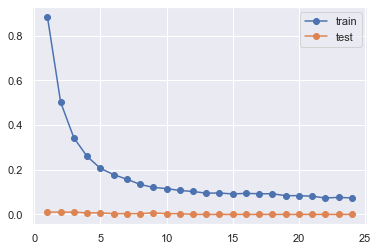

In [149]:
import matplotlib.pyplot as plt

plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()